# **Proyecto ML - Machine Learning**
## **Grupo 1**

### 0. Importamos las librerías necesarias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import ast

from sklearn.model_selection import train_test_split

pd.options.mode.copy_on_write = True
pd.set_option("display.float_format", "{:.2f}".format)

### 1. Cargamos los datos

Partimos de los datos obtenidos para el Project Break - EDA,<br>
en el que unificamos los datos de 3 trimestres en un dataset anual limpio de duplicados.

In [2]:
df = pd.read_csv("./src/data/df_alquileres_original.csv", index_col= "id")

#### 1.1 Exploración de los datos

Mostramos su forma, información general, descripción estadística de las variables numéricas, las columnas del DataFrame y una primera vista del mismo.

In [3]:
df.shape

(19651, 78)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19651 entries, 21853 to 1368959297523052477
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   19651 non-null  object 
 1   scrape_id                                     19651 non-null  int64  
 2   last_scraped                                  19651 non-null  object 
 3   source                                        19651 non-null  object 
 4   name                                          19651 non-null  object 
 5   description                                   18900 non-null  object 
 6   neighborhood_overview                         9123 non-null   object 
 7   picture_url                                   19650 non-null  object 
 8   host_id                                       19651 non-null  int64  
 9   host_url                                      19

In [5]:
df.describe()

,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,19651.00,19651.00,19635.00,19635.00,19651.00,19651.00,19651.00,14656.00,17495.00,14646.00,...,15485.00,15485.00,15486.00,15483.00,15482.00,19651.00,19651.00,19651.00,19651.00,15486.00
mean,20250305023340.00,254242420.62,61.04,70.31,40.42,-3.69,3.20,1.30,1.44,2.03,...,4.69,4.75,4.75,4.75,4.55,41.33,37.17,4.09,0.05,1.74
std,0.00,203455722.96,147.77,160.20,0.02,0.03,1.92,0.64,0.98,1.50,...,0.44,0.44,0.47,0.38,0.51,87.23,86.18,17.74,0.65,1.93
min,20250305023340.00,31622.00,1.00,1.00,40.33,-3.83,1.00,0.00,0.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.01
25%,20250305023340.00,52530675.00,1.00,2.00,40.41,-3.71,2.00,1.00,1.00,1.00,...,4.61,4.70,4.73,4.67,4.45,1.00,0.00,0.00,0.00,0.32
50%,20250305023340.00,221234990.00,5.00,6.00,40.42,-3.70,3.00,1.00,1.00,2.00,...,4.80,4.86,4.89,4.87,4.67,4.00,2.00,0.00,0.00,1.07
75%,20250305023340.00,438136382.00,34.00,43.00,40.43,-3.68,4.00,1.50,2.00,3.00,...,4.95,4.98,5.00,4.98,4.84,24.00,16.00,1.00,0.00,2.59
max,20250305023340.00,682163282.00,1492.00,1665.00,40.54,-3.55,16.00,15.00,25.00,40.00,...,5.00,5.00,5.00,5.00,5.00,341.00,341.00,168.00,12.00,28.57


In [6]:
df.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar

In [7]:
df.head(5)

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
21853,https://www.airbnb.com/rooms/21853,20250305023340,2025-03-11,city scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.26
30320,https://www.airbnb.com/rooms/30320,20250305023340,2025-03-10,previous scrape,Great Vacational Apartments,NaN,NaN,https://a0.muscache.com/pictures/336868/f67409...,130907,https://www.airbnb.com/users/show/130907,...,4.78,4.90,4.69,NaN,f,3,3,0,0,0.96
30959,https://www.airbnb.com/rooms/30959,20250305023340,2025-03-10,previous scrape,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,NaN,https://a0.muscache.com/pictures/78173471/835e...,132883,https://www.airbnb.com/users/show/132883,...,4.63,4.88,4.25,NaN,f,1,1,0,0,0.07
40916,https://www.airbnb.com/rooms/40916,20250305023340,2025-03-10,previous scrape,Holiday Apartment Madrid Center,NaN,NaN,https://a0.muscache.com/pictures/336736/c3b486...,130907,https://www.airbnb.com/users/show/130907,...,4.79,4.88,4.55,NaN,f,3,3,0,0,0.28
62423,https://www.airbnb.com/rooms/62423,20250305023340,2025-03-12,city scrape,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...,DISTRICT WITH VERY GOOD VIBES IN THE MIDDLE OF...,https://a0.muscache.com/pictures/miso/Hosting-...,303845,https://www.airbnb.com/users/show/303845,...,4.85,4.97,4.58,NaN,f,3,1,2,0,2.73


### 2. Elección de target y definición de X e Y

Elegimos **estimated_revenue_l365d** como variable target, ya que es la variable que nos informa sobre la ganancia o beneficio esperado por un anuncio en todo un año.

Por tanto nuestro como nuestro objetivo es predecir cuanto dinero genera anualmente cada propiedad del dataset, haremos un modelo supervisado de regresion.


In [8]:
y = df["estimated_revenue_l365d"]
X = df.drop("estimated_revenue_l365d", axis=1)

### 3. División en train y test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [10]:
# Guardamos los datos del test

X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

### 4. Análisis del target y su distribución

In [11]:
df["estimated_revenue_l365d"].describe()

count     14657.00
mean      12534.22
std       32348.86
min           0.00
25%         612.00
50%        6318.00
75%       18426.00
max     2636136.00
Name: estimated_revenue_l365d, dtype: float64

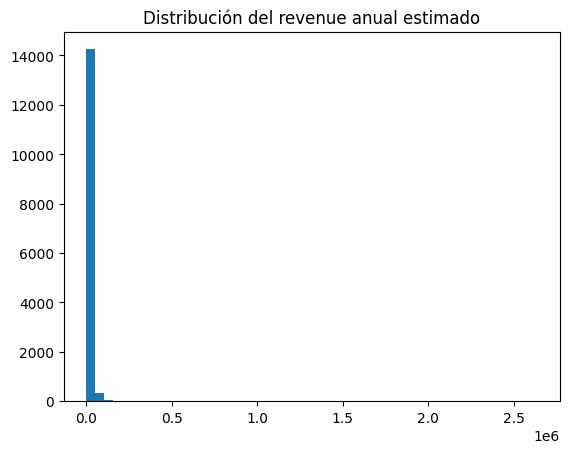

In [12]:
plt.hist(df["estimated_revenue_l365d"], bins=50)
plt.title("Distribución del revenue anual estimado")
plt.show()

La variable objetivo presenta una distribución fuertemente sesgada a la derecha, con presencia de valores extremos muy elevados. La media es significativamente superior a la mediana, lo que confirma la asimetría. Además, existen valores 0 que deberán analizarse para determinar si corresponden a ausencia de actividad o a posibles errores.

Con el fin de reducir la asimetria, hacer la distribucion mas "normal" y reducir el impacto de los outliers vamos a hacer la función logaritmica.

In [13]:
y_log = np.log1p(df["estimated_revenue_l365d"])

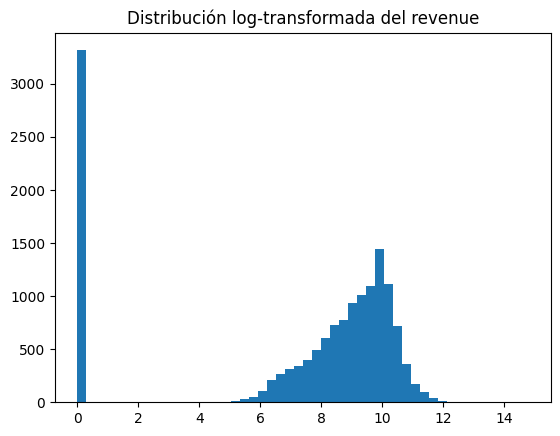

In [14]:
plt.hist(np.log1p(df["estimated_revenue_l365d"]), bins=50)
plt.title("Distribución log-transformada del revenue")
plt.show()

### 5. Comprensión de variables 

In [15]:
df.dtypes.value_counts()

object     36
float64    23
int64      19
Name: count, dtype: int64

In [16]:
df.select_dtypes(include=["object", "string"]).shape

(19651, 36)

In [17]:
df.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar

In [18]:
# Hacemos una primera eliminacion de variables que no vamos a utilizar

cols_drop = [
    "listing_url",
    "scrape_id",
    "picture_url",
    "host_url",
    "host_thumbnail_url",
    "host_picture_url"
]

df = df.drop(columns=cols_drop, errors="ignore")

#### 5.1 Analisis univariante.

Dividimos las variables en numericas y categoricas.

In [19]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "string"]).columns.tolist()

print("Numéricas:", len(num_cols))
print("Categóricas:", len(cat_cols))

Numéricas: 41
Categóricas: 31


In [20]:
# Analizamos las variables numericas excluyendo la target.

num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

num_cols.remove("estimated_revenue_l365d")

In [21]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,19651.00,254242420.62,203455722.96,31622.00,52530675.00,221234990.00,438136382.00,682163282.00
host_listings_count,19635.00,61.04,147.77,1.00,1.00,5.00,34.00,1492.00
host_total_listings_count,19635.00,70.31,160.20,1.00,2.00,6.00,43.00,1665.00
latitude,19651.00,40.42,0.02,40.33,40.41,40.42,40.43,40.54
longitude,19651.00,-3.69,0.03,-3.83,-3.71,-3.70,-3.68,-3.55
accommodates,19651.00,3.20,1.92,1.00,2.00,3.00,4.00,16.00
bathrooms,14656.00,1.30,0.64,0.00,1.00,1.00,1.50,15.00
bedrooms,17495.00,1.44,0.98,0.00,1.00,1.00,2.00,25.00
beds,14646.00,2.03,1.50,0.00,1.00,2.00,3.00,40.00
minimum_nights,19651.00,9.17,32.83,1.00,1.00,2.00,4.00,1125.00


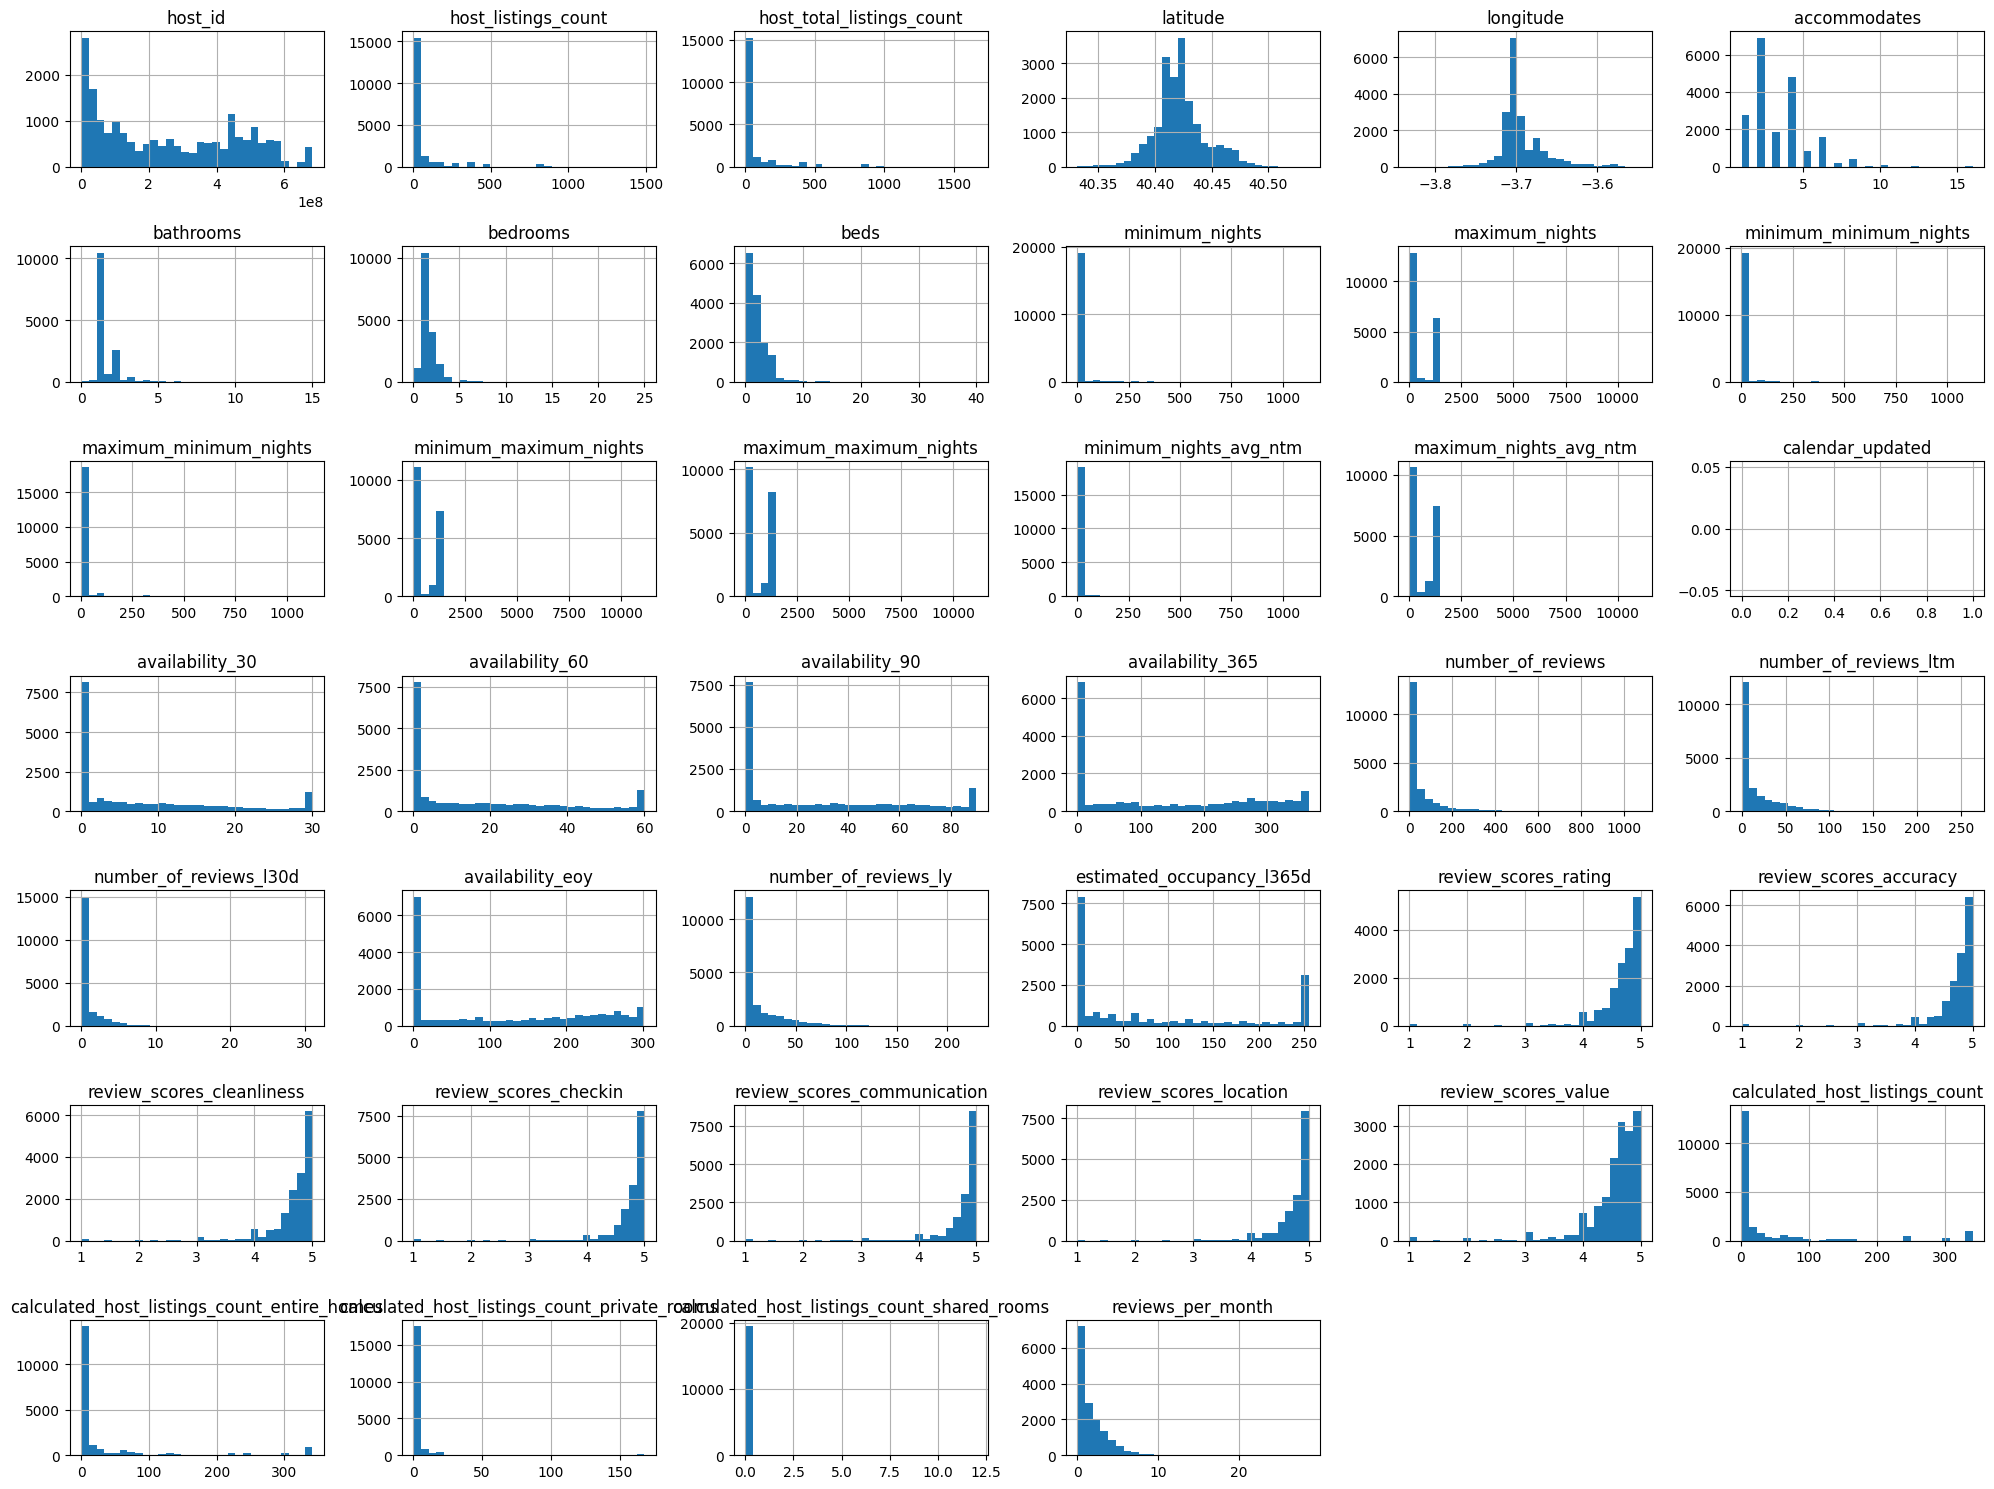

In [22]:
df[num_cols].hist(figsize=(20,15), bins=30)
plt.tight_layout()
plt.show()

Durante el análisis univariante se observa que muchas de las variables numéricas presentan una fuerte asimetría, con distribuciones sesgadas hacia la derecha y presencia de valores extremos. Esto sugiere la necesidad de un tratamiento posterior de outliers y posibles transformaciones.

Se identifican variables potencialmente redundantes, especialmente dentro de los bloques de disponibilidad (availability_30, availability_60, availability_90, availability_365, availability_eoy) y de restricciones de estancia (minimum_nights, maximum_nights y sus derivados como minimum_minimum_nights, maximum_maximum_nights, etc.). Estas variables miden conceptos muy similares en distintos horizontes temporales o como agregaciones estadísticas, por lo que es esperable que presenten una alta correlación entre sí. Esto puede generar multicolinealidad en modelos lineales, por lo que posteriormente se evaluará la conveniencia de seleccionar únicamente las variables más representativas de cada bloque.

Asimismo, se detectan variables que actúan como identificadores (por ejemplo, host_id), las cuales no aportan información predictiva real y deben ser eliminadas del modelado.

Por último, algunas variables como los review_scores presentan una variabilidad reducida, concentrándose en valores altos (entre 4 y 5), lo que puede limitar su capacidad explicativa. También se detectan valores extremos en varias variables que deberán analizarse y tratarse en etapas posteriores del preprocesamiento.

In [23]:
# Eliminamos esta columna porque esta completamente vacia.

df = df.drop(columns=["calendar_updated"], errors="ignore")

In [24]:
# Recalculo las variables numericas despues de la eliminacion de la variable anterior.

num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols.remove("estimated_revenue_l365d")

#### 5.2 Analizamos la correlacion entre las variables numericas y la variable target.


In [25]:
# Creamos revenue_log
df["revenue_log"] = np.log1p(df["estimated_revenue_l365d"])

# Recalculamos numéricas EXCLUYENDO target y revenue_log
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

num_cols.remove("estimated_revenue_l365d")
num_cols.remove("revenue_log")

# Ahora calculamos correlaciones
corr_matrix = df[num_cols + ["revenue_log"]].corr()

corr_with_target = corr_matrix["revenue_log"].sort_values(ascending=False)

corr_with_target.head(15)

revenue_log                   1.00
estimated_occupancy_l365d     0.72
number_of_reviews_ltm         0.54
number_of_reviews_ly          0.53
number_of_reviews_l30d        0.42
reviews_per_month             0.42
number_of_reviews             0.39
maximum_nights_avg_ntm        0.19
minimum_maximum_nights        0.19
accommodates                  0.18
maximum_maximum_nights        0.18
review_scores_communication   0.16
review_scores_accuracy        0.16
review_scores_value           0.16
review_scores_rating          0.16
Name: revenue_log, dtype: float64

Del análisis bivariante se observa que el bloque de variables con mayor relación con la variable objetivo es el compuesto por la ocupación estimada anual (estimated_occupancy_l365d) y las métricas asociadas al volumen de reseñas (number_of_reviews_ltm, number_of_reviews_ly, number_of_reviews_l30d, reviews_per_month, number_of_reviews).

Estas variables presentan las correlaciones más elevadas con el revenue log-transformado, lo que sugiere que la intensidad de uso del alojamiento y su nivel de actividad están fuertemente vinculados con los ingresos generados.

Por otro lado, las variables estructurales del alojamiento (como capacidad o características físicas) muestran una correlación moderada, indicando que influyen en el revenue, aunque en menor medida que las variables de actividad.

Finalmente, las variables relacionadas con restricciones de estancia (bloque de “nights”) presentan una relación más débil y potencialmente redundante entre sí, por lo que será necesario evaluar su posible reducción para evitar problemas de multicolinealidad en modelos posteriores.

In [26]:
# Vemos la correlacion entre las features mas importantes 

important_vars = [
    "estimated_occupancy_l365d",
    "number_of_reviews_ltm",
    "number_of_reviews_ly",
    "number_of_reviews_l30d",
    "reviews_per_month",
    "number_of_reviews"
]

df[important_vars].corr()

,estimated_occupancy_l365d,number_of_reviews_ltm,number_of_reviews_ly,number_of_reviews_l30d,reviews_per_month,number_of_reviews
estimated_occupancy_l365d,1.00,0.83,0.82,0.61,0.67,0.60
number_of_reviews_ltm,0.83,1.00,0.99,0.74,0.85,0.71
number_of_reviews_ly,0.82,0.99,1.00,0.67,0.81,0.74
number_of_reviews_l30d,0.61,0.74,0.67,1.00,0.76,0.48
reviews_per_month,0.67,0.85,0.81,0.76,1.00,0.57
number_of_reviews,0.60,0.71,0.74,0.48,0.57,1.00


Dado el elevado grado de colinealidad detectado dentro del bloque de variables de actividad, se optará por construir distintos modelos utilizando subconjuntos representativos de estas variables, evitando incluir simultáneamente métricas altamente correlacionadas para prevenir problemas de multicolinealidad.

#### 5.3 Analisis variante de las variables categoricas

In [27]:
len(cat_cols)

31

In [28]:
for col in cat_cols:
    print(f"Para \033[1m{col}\033[0m hay {df[col].nunique()} valores únicos")

Para last_scraped hay 8 valores únicos
Para source hay 2 valores únicos
Para name hay 18576 valores únicos
Para description hay 15746 valores únicos
Para neighborhood_overview hay 6958 valores únicos
Para host_name hay 3379 valores únicos
Para host_since hay 3809 valores únicos
Para host_location hay 402 valores únicos
Para host_about hay 3634 valores únicos
Para host_response_time hay 4 valores únicos
Para host_response_rate hay 76 valores únicos
Para host_acceptance_rate hay 101 valores únicos
Para host_is_superhost hay 2 valores únicos
Para host_neighbourhood hay 128 valores únicos
Para host_verifications hay 7 valores únicos
Para host_has_profile_pic hay 2 valores únicos
Para host_identity_verified hay 2 valores únicos
Para neighbourhood hay 29 valores únicos
Para neighbourhood_cleansed hay 128 valores únicos
Para neighbourhood_group_cleansed hay 21 valores únicos
Para property_type hay 63 valores únicos
Para room_type hay 4 valores únicos
Para bathrooms_text hay 35 valores únicos


In [29]:
cat_model = [col for col in cat_cols if df[col].nunique() <= 25]
cat_model

['last_scraped',
 'source',
 'host_response_time',
 'host_is_superhost',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'room_type',
 'has_availability',
 'calendar_last_scraped',
 'instant_bookable']

Tras el análisis univariante de las variables categóricas, se ha optado por seleccionar únicamente aquellas con baja o moderada cardinalidad y potencial capacidad explicativa respecto a la variable objetivo.

Se descartan variables de texto libre, fechas técnicas o identificadores, así como aquellas con excesivo número de categorías que podrían generar un alto número de variables dummy y aumentar innecesariamente la complejidad del modelo.

 Las variables seleccionadas presentan una estructura interpretable, categorías bien definidas y relevancia conceptual en el contexto del negocio (tipo de alojamiento, características del anfitrión y disponibilidad), lo que las convierte en candidatas adecuadas para el análisis bivariante y su posible inclusión en modelos predictivos posteriores.

In [30]:
cat_analysis = [
    "room_type",
    "host_is_superhost",
    "instant_bookable",
    "host_response_time",
    "neighbourhood_group_cleansed",
    "host_identity_verified",
    "host_has_profile_pic"
]

In [31]:
for col in cat_analysis:
    print("\n", col)
    print(df.groupby(col)["revenue_log"].mean().sort_values())


 room_type
room_type
Hotel room        2.93
Shared room       5.64
Private room      5.77
Entire home/apt   7.44
Name: revenue_log, dtype: float64

 host_is_superhost
host_is_superhost
f   6.10
t   8.96
Name: revenue_log, dtype: float64

 instant_bookable
instant_bookable
f   6.54
t   7.50
Name: revenue_log, dtype: float64

 host_response_time
host_response_time
a few days or more   1.57
within a day         3.80
within a few hours   5.78
within an hour       8.17
Name: revenue_log, dtype: float64

 neighbourhood_group_cleansed
neighbourhood_group_cleansed
Chamberí                5.81
Moratalaz               5.90
Villaverde              6.02
Tetuán                  6.05
Moncloa - Aravaca       6.18
Latina                  6.29
Hortaleza               6.30
Fuencarral - El Pardo   6.32
Villa de Vallecas       6.36
Carabanchel             6.42
Retiro                  6.47
Puente de Vallecas      6.51
San Blas - Canillejas   6.54
Chamartín               6.54
Ciudad Lineal           6.62
B

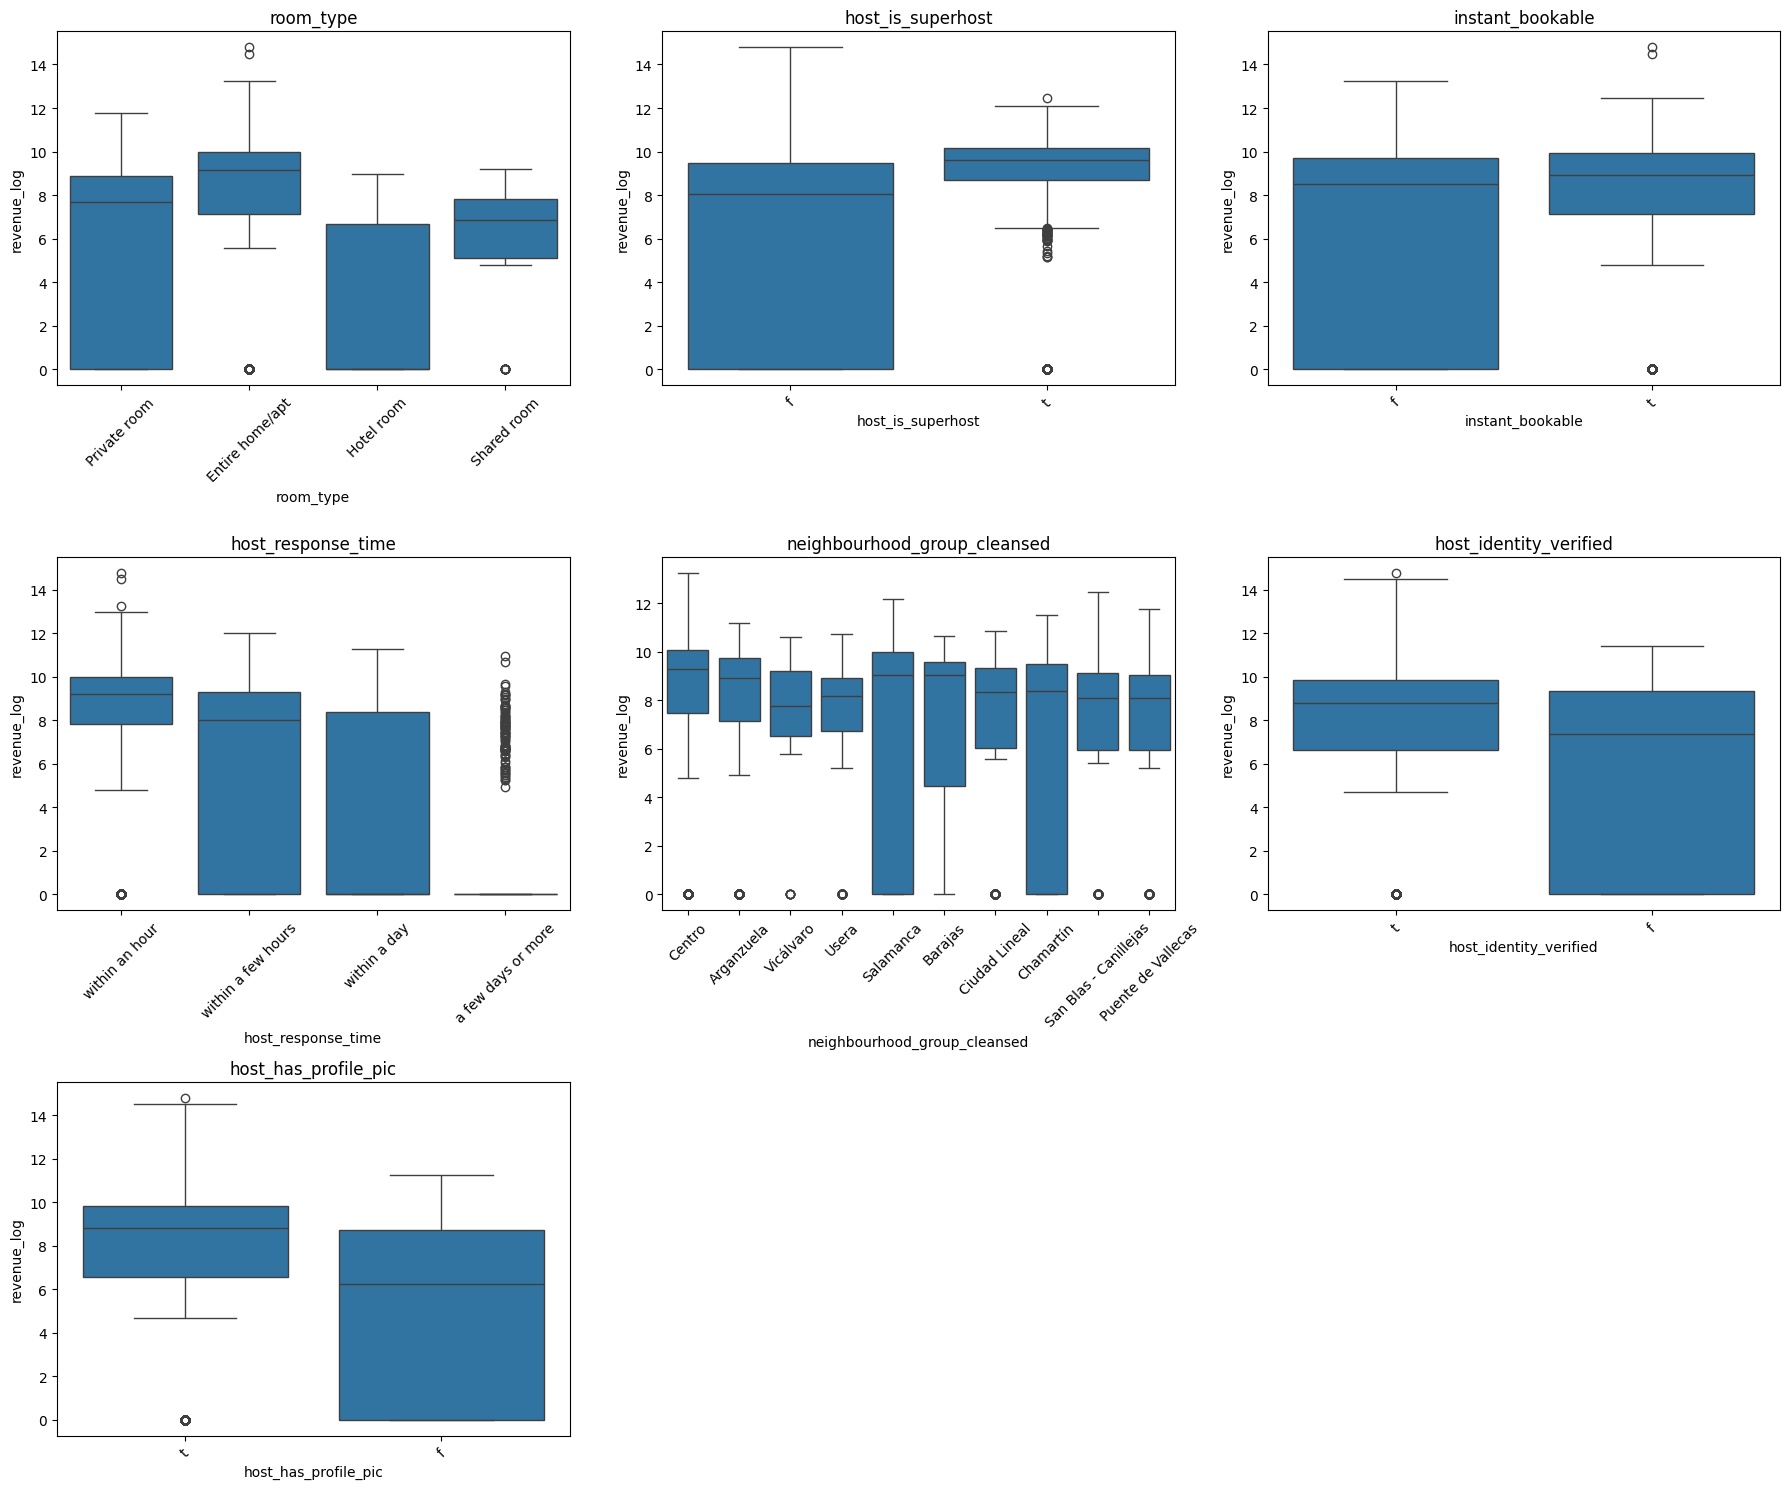

In [32]:
import math

n_cols = 3
n_rows = math.ceil(len(cat_analysis) / n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(cat_analysis):
    ax = plt.subplot(n_rows, n_cols, i + 1)

    # Caso especial: Top 10 barrios por revenue medio
    if col == "neighbourhood_group_cleansed":
        
        top10 = (
            df.groupby(col)["revenue_log"]
              .mean()
              .sort_values(ascending=False)
              .head(10)
              .index
        )
        
        df_plot = df[df[col].isin(top10)].copy()

        # Ordenamos de mayor a menor revenue medio
        order = (
            df_plot.groupby(col)["revenue_log"]
                   .mean()
                   .sort_values(ascending=False)
                   .index
        )

        sns.boxplot(
            x=col,
            y="revenue_log",
            data=df_plot,
            order=order,
            ax=ax
        )

    else:
        sns.boxplot(
            x=col,
            y="revenue_log",
            data=df,
            ax=ax
        )

    ax.tick_params(axis='x', rotation=45)
    ax.set_title(col)

plt.tight_layout()
plt.show()

En el análisis bivariante de variables categóricas se observan diferencias claras en la distribución del revenue según ciertas categorías.

Destaca especialmente **room_type**, donde los alojamientos de tipo Entire home/apt muestran mayores valores de revenue_log frente a habitaciones privadas o compartidas. Variables relacionadas con el anfitrión como **host_is_superhost** y **host_response_time** también presentan una asociación positiva con el revenue, mientras que **instant_bookable** muestra un efecto más moderado.

Por último, **neighbourhood_group_cleansed** evidencia variaciones entre distritos, aunque su mayor número de categorías podría requerir estrategias de reducción o agrupación para su uso en modelos posteriores.

In [33]:
for col in cat_analysis:
    print("\n", col)
    print(df[col].value_counts(dropna=False).head(15))


 room_type
room_type
Entire home/apt    13364
Private room        6132
Shared room           88
Hotel room            67
Name: count, dtype: int64

 host_is_superhost
host_is_superhost
f      14396
t       4645
NaN      610
Name: count, dtype: int64

 instant_bookable
instant_bookable
f    11254
t     8397
Name: count, dtype: int64

 host_response_time
host_response_time
within an hour        11132
NaN                    4501
within a few hours     2090
within a day           1330
a few days or more      598
Name: count, dtype: int64

 neighbourhood_group_cleansed
neighbourhood_group_cleansed
Centro                   8185
Salamanca                1339
Chamberí                 1321
Tetuán                   1241
Arganzuela               1043
Retiro                    765
Carabanchel               693
Chamartín                 677
Ciudad Lineal             644
Puente de Vallecas        585
Moncloa - Aravaca         545
Latina                    505
San Blas - Canillejas     465
Usera    

In [34]:
df["host_response_time"].value_counts(dropna=False)

host_response_time
within an hour        11132
NaN                    4501
within a few hours     2090
within a day           1330
a few days or more      598
Name: count, dtype: int64

La variable **host_response_time** presenta un claro desbalance hacia respuestas rápidas, concentrándose principalmente en la categoría "within an hour". Además, se observa un porcentaje relevante de valores faltantes (~23%), lo que requerirá imputación o tratamiento específico. Dado que la variable posee un orden natural en sus categorías, puede considerarse su codificación ordinal para capturar mejor la relación entre rapidez de respuesta y revenue.

In [35]:
response_order = {
    "within an hour": 0,
    "within a few hours": 1,
    "within a day": 2,
    "a few days or more": 3
}

df["host_response_time_ord"] = df["host_response_time"].map(response_order)

In [36]:
df["room_type_simplified"] = df["room_type"].replace({
    "Shared room": "Other",
    "Hotel room": "Other"
})

In [37]:
bin_cols = ["host_is_superhost", "host_identity_verified", "host_has_profile_pic", "instant_bookable"]

for c in bin_cols:
    if c in df.columns:
        df[c] = df[c].fillna("Unknown")

En esta fase se ha realizado un preprocesamiento específico de algunas variables categóricas con el objetivo de prepararlas para el modelado.<br>En primer lugar, la variable host_response_time, que posee un orden natural en sus categorías, ha sido transformada en una variable ordinal numérica. Esta codificación permite preservar la jerarquía implícita en el tiempo de respuesta del anfitrión (desde respuestas más rápidas hasta más lentas), facilitando que los modelos puedan capturar mejor su posible relación con el revenue.

Por otro lado, se ha simplificado la variable room_type, agrupando las categorías con muy baja representación ("Shared room" y "Hotel room") bajo una nueva categoría común ("Other"). Esta decisión reduce la dispersión de información y evita que categorías con pocos registros introduzcan ruido en el modelo.<br>Finalmente, en las variables binarias relacionadas con características del anfitrión (host_is_superhost, host_identity_verified, host_has_profile_pic e instant_bookable), se han imputado los valores faltantes con la categoría "Unknown", evitando la pérdida de observaciones y manteniendo la coherencia categórica para su posterior codificación.

### 6. Reducción o eliminación de features preliminar

In [38]:
# Eliminamos variables de texto largas

text_cols = [
    "name",
    "description",
    "neighborhood_overview",
    "host_about",
    "amenities"
]

df = df.drop(columns=[c for c in text_cols if c in df.columns])

In [39]:
# Eliminamos identificadores sin capacidad predictiva.

id_cols = ["host_id"]

df = df.drop(columns=[c for c in id_cols if c in df.columns])

En esta fase se realiza una depuración moderada del conjunto de variables con el objetivo de eliminar información no estructurada y posibles identificadores sin capacidad predictiva, manteniendo, no obstante, aquellas variables potencialmente redundantes que podrían aportar valor en modelos no lineales.<br>Dado que el análisis contempla tanto modelos lineales como modelos basados en árboles, se opta por una estrategia intermedia: reducir variables claramente irrelevantes sin aplicar una eliminación excesivamente restrictiva, permitiendo posteriormente comparar el comportamiento de distintos algoritmos frente a posibles problemas de multicolinealidad.

In [40]:
# Dejamos unicamente la variable availability_365 del bloque de availability
#  ya que muestran una correlacion muy fuerte.

availability_cols = [
    "availability_30",
    "availability_60",
    "availability_90",
    "availability_eoy"
]

df = df.drop(columns=[c for c in availability_cols if c in df.columns])

In [41]:
# Mantenemos las variables number_of_reviews_ltm y reviews_per_month del bloque de reviews.

reviews_drop = [
    "number_of_reviews",
    "number_of_reviews_ly",
    "number_of_reviews_l30d"
]

df = df.drop(columns=[c for c in reviews_drop if c in df.columns])

In [42]:
# Mantenemos unicamente minimum_nights y maximum_nights del bloque de nights.

nights_drop = [
    "minimum_minimum_nights",
    "minimum_maximum_nights",
    "maximum_minimum_nights",
    "maximum_maximum_nights",
    "minimum_nights_avg_ntm",
    "maximum_nights_avg_ntm"
]

df = df.drop(columns=[c for c in nights_drop if c in df.columns])


### 7.Duplicados. Comprobación y eliminación

In [43]:
duplicates = df.duplicated().sum()
print("Número de duplicados:", duplicates)

Número de duplicados: 3


In [44]:
# Eliminamos los duplicados 
df = df.drop_duplicates()
print("Nuevo tamaño del dataset:", df.shape)

Nuevo tamaño del dataset: (19648, 55)


### 8. Detección y tratamiento de missings

In [45]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

license                        17158
host_neighbourhood             12360
neighbourhood                  10525
host_location                   5929
beds                            5005
bathrooms                       4995
price                           4994
estimated_revenue_l365d         4994
revenue_log                     4994
host_response_time              4501
host_response_time_ord          4501
host_response_rate              4501
review_scores_value             4166
review_scores_location          4165
review_scores_cleanliness       4163
review_scores_checkin           4163
reviews_per_month               4162
first_review                    4162
last_review                     4162
review_scores_accuracy          4162
review_scores_rating            4162
review_scores_communication     4162
host_acceptance_rate            3611
bedrooms                        2156
has_availability                1352
bathrooms_text                    19
host_name                         16
h

En la revisión de valores faltantes se identifican variables con un porcentaje extremadamente elevado de datos ausentes, como license o ciertas variables geográficas de alta cardinalidad, que se eliminan por su escasa utilidad y elevada incompletitud.<br>En el resto de variables, se opta por estrategias de imputación diferenciadas según su naturaleza: imputación con mediana para variables numéricas, creación de categorías específicas para variables categóricas y tratamiento especial en variables relacionadas con reviews, donde la ausencia de datos puede reflejar la inexistencia de valoraciones.

In [46]:
# 1) Eliminamos columnas con demasiados NaN y baja utilidad
drop_missing_cols = ["license", "host_neighbourhood", "neighbourhood", "host_location"]
df = df.drop(columns=[c for c in drop_missing_cols if c in df.columns], errors="ignore")


# 2) Eliminamos filas sin target
df = df.dropna(subset=["estimated_revenue_l365d"])


# Recalculamos revenue_log para asegurar consistencia
df["revenue_log"] = np.log1p(df["estimated_revenue_l365d"])


# 3) PRICE: convertir a numérico + imputar con mediana
if "price" in df.columns:
    df["price"] = (
        df["price"]
        .astype(str)
        .str.replace(r"[\$,]", "", regex=True)
        .str.replace(r"\s+", "", regex=True)
    )
    df["price"] = pd.to_numeric(df["price"], errors="coerce")
    df["price"] = df["price"].fillna(df["price"].median())


# 4) Imputación numéricas básicas (mediana)
num_impute = ["beds", "bathrooms", "bedrooms"]
for col in num_impute:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        df[col] = df[col].fillna(df[col].median())


# 5) host_response_time_ord: -1 como categoría "Unknown"
if "host_response_time_ord" in df.columns:
    df["host_response_time_ord"] = pd.to_numeric(df["host_response_time_ord"], errors="coerce")
    df["host_response_time_ord"] = df["host_response_time_ord"].fillna(-1)


# 6) Review scores: flag + imputación con 0
if "review_scores_rating" in df.columns:
    df["has_reviews"] = df["review_scores_rating"].notnull().astype(int)

review_cols = [c for c in df.columns if "review_scores" in c]
for col in review_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df[col].fillna(0)


# 7) Tasas del host: convertir de "%" a numérico + mediana
rate_cols = ["host_response_rate", "host_acceptance_rate"]
for col in rate_cols:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace("%", "", regex=False)
            .str.replace(r"\s+", "", regex=True)
        )
        df[col] = pd.to_numeric(df[col], errors="coerce")
        df[col] = df[col].fillna(df[col].median())


# 8) Comprobación final
missing_final = df.isnull().sum().sort_values(ascending=False)
print("Missings restantes (>0):")
print(missing_final[missing_final > 0])
print("\nTamaño final del dataset:", df.shape)

Missings restantes (>0):
last_review                  2347
reviews_per_month            2347
first_review                 2347
host_response_time            950
has_availability               63
bathrooms_text                 12
host_verifications              8
host_listings_count             8
host_total_listings_count       8
host_since                      8
host_name                       8
dtype: int64

Tamaño final del dataset: (14654, 52)


In [47]:
# Tratamos los missings restantes

'''1) last_review es una columna con valor tipo fecha, por lo que nos interesa sacar una columna
    booleana que muestre si ha tenido reviews o no y otra que muestre los días desde la última review,
    imputando 9999 para los casos en que nunca ha habido review
'''
df["has_reviews"] = df["last_review"].notna().astype(int)
df.last_review = pd.to_datetime(df.last_review, errors="coerce")
reference_date = pd.Timestamp("2026-02-27")
df["days_since_last_review"] = (reference_date - df.last_review).dt.days
df["days_since_last_review"] = df["days_since_last_review"].fillna(9999)
df["days_since_last_review"].astype(int)

id
21853                  2784
62423                   372
70059                  1166
72150                   362
84719                  1612
                       ... 
1368903492306099065    9999
1368920151972556742    9999
1368927593272564098    9999
1368958026506182553    9999
1368959297523052477     355
Name: days_since_last_review, Length: 14654, dtype: int64

In [48]:
'''2) first_review hace referencia a la fecha de primera review en caso de que la hubiera
    por lo que vamos a transformar a días e imputamos 0 a los nulos
'''
df.first_review = pd.to_datetime(df.first_review, errors="coerce")
df["review_lifetime"] = (df.last_review - df.first_review).dt.days
df["review_lifetime"] = df["review_lifetime"].fillna(0)
df.review_lifetime.astype(int)

id
21853                  1374
62423                  2478
70059                  4317
72150                  5131
84719                  3798
                       ... 
1368903492306099065       0
1368920151972556742       0
1368927593272564098       0
1368958026506182553       0
1368959297523052477       0
Name: review_lifetime, Length: 14654, dtype: int64

In [49]:
'''3) reviews_per_month Al hacer referencia a cantidad de reviews mensuales,
    un missing o nulo, debería ser igual a 0.
'''
df.reviews_per_month = df.reviews_per_month.fillna(0)

In [50]:
'''4) host_response_time se refiere a la periodicidad de respuesta del antiftrión y es de tipo texto,
    en este caso vamos a crear una columna adicional de si hay o no respuesta del anfitrion
    y mapear con valores numéricos el texto de respuesta
'''
df.host_response_time.value_counts(dropna=False)
map_response_time = {
    "within an hour": 1,
    "within a few hours": 2,
    "within a day": 3,
    "a few days or more": 4
}
df["host_response_time_num"] = df["host_response_time"].map(map_response_time)
df["host_response_time_num"] = df["host_response_time_num"].fillna(4)

df["has_host_responded"] = df["host_response_time"].isna().astype(int)

In [51]:
'''5) has_availability se refiere a la disponibilidad del alojamiento,
    por lo que un nulo sería un valor 0.
'''
df.has_availability = df.has_availability.isna().astype(int)

In [52]:
'''6) bathrooms_text Es una variable texto que tiene 34 valores únicos que trataremos
    más adelante para darle sentido.
    De momento imputamos a los nulos la moda
'''
df.bathrooms_text = df.bathrooms_text.fillna(df.bathrooms_text.mode()[0])

In [53]:
'''7) host_verifications Hace referencia a la cantidad de elementos de verificación que tiene el usuario,
    por lo que podemos convertirlo en numérica
'''
df.host_verifications = df.host_verifications.fillna("[]")
df["host_verifications_list"] = df.host_verifications.apply(ast.literal_eval)
df.host_verifications = df.host_verifications_list.apply(len)

In [54]:
'''8) host_listings_count Son las veces que el anfitrión ha listado esta propiedad.
    Imputamos la mediana
'''
df.host_listings_count = df.host_listings_count.fillna(df.host_listings_count.median())

In [55]:
'''9) host_total_listings_count Son las veces que el anfitrión ha listado una propiedad.
    Imputamos la mediana
'''
df.host_total_listings_count = df.host_total_listings_count.fillna(df.host_total_listings_count.median())

In [56]:
'''10) host_since Fecha de antigüedad del antifrión.
    Siguiendo la lógica de casos anteriores, vamos a convertirlo en días.
'''
df.host_since = pd.to_datetime(df.host_since, errors= "coerce")
df.host_since = (reference_date - df.host_since).dt.days
df.host_since = df.host_since.fillna(df.host_since.median())
df.host_since = df.host_since.astype(int)

In [57]:
'''11) host_name Hace referencia a un dato personal que no tiene relevancia para el estudio,
    por lo que dropeamos la columna
'''
df.drop(columns="host_name", inplace= True)

In [58]:
df.drop(columns=["last_review","first_review","host_response_time","host_verifications_list"], inplace= True)

### 9. Anomalías, errores y Outliers

In [59]:
df.sample(10)

,last_scraped,source,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,...,calculated_host_listings_count_shared_rooms,reviews_per_month,revenue_log,host_response_time_ord,room_type_simplified,has_reviews,days_since_last_review,review_lifetime,host_response_time_num,has_host_responded
id,,,,,,,,,,,,,,,,,,,,,
33311625,2025-03-10,city scrape,3425,100.00,100.00,t,4.00,4.00,3,t,...,0,2.71,8.98,0.00,Private room,1,368.00,2154.00,1.00,0
42072222,2025-03-12,city scrape,2696,100.00,100.00,f,66.00,66.00,2,t,...,0,2.33,9.89,0.00,Entire home/apt,1,378.00,1517.00,1.00,0
1118918594600182177,2025-03-08,city scrape,2260,100.00,99.00,f,25.00,26.00,2,t,...,12,0.62,6.63,0.00,Other,1,395.00,252.00,1.00,0
1203368534366035441,2025-03-12,city scrape,1816,99.00,100.00,f,97.00,118.00,2,t,...,0,0.15,6.74,0.00,Entire home/apt,1,547.00,0.00,1.00,0
1341318198848335907,2025-03-10,city scrape,399,100.00,100.00,f,1.00,1.00,2,t,...,0,1.67,7.22,0.00,Entire home/apt,1,375.00,14.00,1.00,0
34377097,2025-03-12,city scrape,3956,100.00,99.00,f,2.00,2.00,2,t,...,0,0.00,0.00,-1.00,Private room,0,9999.00,0.00,4.00,1
711977613816253525,2025-03-05,city scrape,1481,100.00,99.00,t,4.00,4.00,3,t,...,0,3.13,10.65,1.00,Entire home/apt,1,376.00,863.00,2.00,0
1186905968827884859,2025-03-12,city scrape,1199,97.00,100.00,t,4.00,4.00,2,t,...,0,0.13,7.58,0.00,Private room,1,576.00,0.00,1.00,0
1269572385829721723,2025-03-06,city scrape,573,100.00,100.00,f,1.00,2.00,1,t,...,0,0.00,0.00,0.00,Entire home/apt,0,9999.00,0.00,1.00,0


In [60]:
# Sacamos un describe con los percentiles 1% y 99% para ver si hay mucha diferencia entre el mín y max
df.describe(percentiles=[0.01, 0.99]).T[
    ["min", "1%", "99%", "max"]
]

,min,1%,99%,max
host_since,361.00,420.00,5232.94,6041.00
host_response_rate,0.00,0.00,100.00,100.00
host_acceptance_rate,0.00,0.00,100.00,100.00
host_listings_count,1.00,1.00,841.00,1492.00
host_total_listings_count,1.00,1.00,853.00,1665.00
host_verifications,0.00,1.00,3.00,3.00
latitude,40.33,40.37,40.48,40.54
longitude,-3.83,-3.75,-3.59,-3.55
accommodates,1.00,1.00,10.00,16.00
bathrooms,0.00,0.50,4.00,15.00


In [61]:
# Aplicaremos winsorización a aquellas features cuyos valor máximo supere por mucho al 99% y no tenga lógica
# La winsorización consiste en igualar los valores máximos al 99%
columns_to_winsor = ["bathrooms","bedrooms","beds","price","reviews_per_month"]
for col in columns_to_winsor:
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(upper=upper)

En este apartado hemos detectado una serie de outliers máximos que consideramos poco lógicos por baja probabilidad, como que un alojamiento en madrid tenga 15 baños cuando el 99% máximo tienen 4.
Otras features como **estimated_revenue_l365d** no tratamos aquí sus outliers ya que lo tratamos al crear revenue_log

### 10. Feature engineering

Aquí vamos a tratar las variables categóricas o cualitativas para darles un sentido ordinal o numérico para que el modelo pueda trabajar con ellas.


#### 10.1 Encodings

In [62]:
# Sacaremos un listado de las columnas categóricas que tenemos actualmente en el dataframe
cols_categoricas = df.select_dtypes(include="object").columns.to_list()
cols_categoricas

['last_scraped',
 'source',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text',
 'calendar_last_scraped',
 'instant_bookable',
 'room_type_simplified']

In [63]:
# Miraremos su cardinalidad para detectar binarias, baja cardinalidad o alta y ver qué hacer con cada una
cardinalidad_categoricas = pd.DataFrame({
    "col_categorica": cols_categoricas,
    "valores_unicos": [df[col].nunique() for col in cols_categoricas]
}).sort_values(by="valores_unicos", ascending=False)
cardinalidad_categoricas


,col_categorica,valores_unicos
5,neighbourhood_cleansed,128
7,property_type,56
9,bathrooms_text,33
6,neighbourhood_group_cleansed,21
0,last_scraped,8
10,calendar_last_scraped,8
8,room_type,4
3,host_has_profile_pic,3
2,host_is_superhost,3
12,room_type_simplified,3


Comenzamos por las features **last_scraped** y **calendar_last_scraped** que son fechas en las que se obtuvo la información del anuncio.
En este caso vemos que sus valores son los mismos y no aportan información para los modelos, por lo que las eliminamos.

In [64]:
df[["last_scraped","calendar_last_scraped"]].value_counts()

last_scraped  calendar_last_scraped
2025-03-06    2025-03-06               4178
2025-03-12    2025-03-12               3175
2025-03-05    2025-03-05               2726
2025-03-10    2025-03-10               1413
2025-03-07    2025-03-07               1399
2025-03-08    2025-03-08               1180
2025-03-11    2025-03-11                467
2025-03-09    2025-03-09                116
Name: count, dtype: int64

In [65]:
df.drop(columns=["last_scraped","calendar_last_scraped"],inplace=True)

Seguimos por aquellas de baja cardinalidad como **host_has_profile_pic,host_is_superhost,host_identity_verified,instant_bookable y source** que son susceptibles de ser binarias u objeto de hot encoding

In [66]:
for col in ["host_has_profile_pic","host_is_superhost","host_identity_verified","instant_bookable","source"]:
    print(f"Para \033[1m{col}\033[0m existen los siguientes valores:\n"+
          f"{df[col].value_counts()}\n")

Para host_has_profile_pic existen los siguientes valores:
host_has_profile_pic
t          14148
f            498
Unknown        8
Name: count, dtype: int64

Para host_is_superhost existen los siguientes valores:
host_is_superhost
f          9932
t          4171
Unknown     551
Name: count, dtype: int64

Para host_identity_verified existen los siguientes valores:
host_identity_verified
t          13696
f            950
Unknown        8
Name: count, dtype: int64

Para instant_bookable existen los siguientes valores:
instant_bookable
f    7433
t    7221
Name: count, dtype: int64

Para source existen los siguientes valores:
source
city scrape    14654
Name: count, dtype: int64



Vemos que aquellas con 3 valores únicos son booleanas y datos desconocidos que trataremos como False, por lo que aplicaremos un mapeo a cada una.<br>
La feature **source** al sólo tener un valor no aporta información para el entrenamiento por lo que descartaremos.

In [67]:
mapeo_binarias = {
    "t": 1,
    "f": 0,
    "Unknown": 0
}

df.host_has_profile_pic = df.host_has_profile_pic.map(mapeo_binarias)
df.host_is_superhost = df.host_is_superhost.map(mapeo_binarias)
df.host_identity_verified = df.host_identity_verified.map(mapeo_binarias)
df.instant_bookable = df.instant_bookable.map(mapeo_binarias)
df.drop(columns="source",inplace=True)

Analizando las siguientes categóricas, vemos que **room_type** y **room_type_simplified**, parecen ser columnas duplicadas, por lo que vamos a ver sus valores y tomar una decisión

In [68]:
df[["room_type", "room_type_simplified"]].value_counts()

room_type        room_type_simplified
Entire home/apt  Entire home/apt         10975
Private room     Private room             3555
Shared room      Other                      82
Hotel room       Other                      42
Name: count, dtype: int64

In [69]:
df.drop(columns="room_type_simplified", inplace= True)
df = pd.get_dummies(df,columns=["room_type"],drop_first=True)

Como vemos que tienen los mismos valores, eliminamos **room_type_simplified** y hacemos un One-Hot encoding de **room_type** de forma que nos cree columnas booleanas para los valores Private room,Shared room y Hotel room, de forma que si estas 3 son 0 significará que el apartamento es Entire home/apt

Con **bathrooms_text** ya imputamos anteriormente la moda a los nulos pero dejamos que siguiera siendo texto, ahora hay que tratarla, por lo que extraeremos el número de baños y el texto private o shared para crear una columna de si es bamo compartido o privado

In [70]:
df["bathrooms_num"] = (
    df["bathrooms_text"]
        .str.extract(r"(\d+\.?\d*)")
        .astype(float)
)
df.loc[df["bathrooms_text"].str.contains("half", case=False, na=False) &
       df["bathrooms_num"].isna(), "bathrooms_num"] = 0.5

df["is_bathroom_shared"] = (
    df["bathrooms_text"]
        .str.contains("shared", case=False, na=False)
        .astype(int)
)
df.drop(columns="bathrooms_text",inplace=True)


Ahora pasamos a columnas de alta cardinalidad por lo que el hot-encoding puede no compensar al crear muchas columnas, empezamos con **neighbourhood_group_cleansed**

In [71]:
df.neighbourhood_group_cleansed.value_counts()

neighbourhood_group_cleansed
Centro                   6394
Salamanca                1019
Tetuán                    988
Chamberí                  949
Arganzuela                734
Retiro                    584
Chamartín                 519
Carabanchel               495
Ciudad Lineal             465
Puente de Vallecas        405
Moncloa - Aravaca         351
Latina                    343
Usera                     309
San Blas - Canillejas     294
Hortaleza                 276
Fuencarral - El Pardo     156
Villaverde                119
Barajas                    92
Moratalaz                  71
Villa de Vallecas          52
Vicálvaro                  39
Name: count, dtype: int64

A pesar de que un One-hot nos crearía 20 columnas adicionales, al ser un Dataset grande, no supone un problema y mantiene la información sin perderla.
Tampoco es viable un mapeo de relevancia por cada distrito ya que sería asignar de forma subjetiva la importancia a cada distrito y contaminaria el modelo, por lo que vamos a optar por One-Hot

In [72]:
df = pd.get_dummies(df,columns=["neighbourhood_group_cleansed"],prefix="ng",drop_first=True)

Ahora nos quedan dos features de alta cardinalidad: **neighbourhood_cleansed** y **property_type**, por lo que One-Hot Encoding no es una opción viable, tendremos que aplicar un target encoding.<br>
Al ser esta una técnica que emplea datos de la variable target, no puede ser aplicada sobre todo el dataset, ya que si se aplica sobre test, aporta al modelo información de la target que no debería conocer.<br><br>
Por tanto y como transformamos nuestra target inicial **estimated_revenue_l365d** en **revenue_log** que será la nueva target,volvemos a dividir en test y train y aplicaremos estas modificaciones únicamente a train

In [73]:
X = df.drop(columns=['revenue_log', 'estimated_revenue_l365d'])
y = df['revenue_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Sobreescribimos los datos del test

X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

Ahora como comentamos anteriormente al hacer target encoding para **neighbourhood_cleansed**, calcularemos la media de revenue_log para cada valor de nuestra feature en train únicamente e imputaremos la media a test para que no haya filtrado de datos

In [75]:
mean_nh_target = X_train.join(y_train).groupby('neighbourhood_cleansed')['revenue_log'].mean()
X_train['neighbourhood_revenue'] = X_train['neighbourhood_cleansed'].map(mean_nh_target)

# Realizamos lo mismo en test sustituyendo por la media de Train
X_test['neighbourhood_revenue'] = X_test['neighbourhood_cleansed'].map(mean_nh_target)
X_test['neighbourhood_revenue'] = X_test['neighbourhood_revenue'].fillna(y_train.mean())

X_train.drop(columns="neighbourhood_cleansed",inplace=True)
X_test.drop(columns="neighbourhood_cleansed",inplace=True)

Por último la feature **property_type**, para este caso planteamos un frequency_encoding, así simplificamos el tratamiento de su variable en base a su frecuencia o "popularidad", sin embargo los valores de la feature tienen 2 categorías con muchos valores (Entire rental unit = 7870, Private room in rental unit = 2025) y el resto son < 300 <br>
Por lo que haremos igualmengte target encoding

In [76]:
mean_pt_target = X_train.join(y_train).groupby('property_type')['revenue_log'].mean()
X_train['pt_revenue'] = X_train['property_type'].map(mean_pt_target)

X_test['pt_revenue'] = X_test['property_type'].map(mean_pt_target)
X_test['pt_revenue'] = X_test['pt_revenue'].fillna(y_train.mean())

X_train.drop(columns="property_type",inplace=True)
X_test.drop(columns="property_type",inplace=True)

### 11. Feature reduction

Como tenemos muchas columnas vamos a intentar eliminar alguna redundante o que sea poco útil para el modelo, aunque ya hemos eliminado y tratado suficiente y la mayoría estñan preparadas para el modelo

In [77]:
print("Shape de X_train",X_train.shape)
print("Shape de X_test",X_test.shape)

Shape de X_train (11723, 68)
Shape de X_test (2931, 68)


In [78]:
# Listamos las columnas
X_train.columns

Index(['host_since', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_365', 'number_of_reviews_ltm',
       'estimated_occupancy_l365d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'host_response_time_ord', 'has_reviews', 'days_since_last_review',
       'r

In [79]:
# Eliminamos todas aquellas redundantes de calculated_host_listings_count*
cols_to_drop = ['calculated_host_listings_count',
                'calculated_host_listings_count_entire_homes',
                'calculated_host_listings_count_private_rooms',
                'calculated_host_listings_count_shared_rooms']

In [80]:
# Visualizamos has_availability y su distribución
X_train.has_availability.value_counts()

has_availability
0    11678
1       45
Name: count, dtype: int64

In [81]:
# La incluímos en cols_to_drop al tener poco reparto de valores y aportar poca información por ello
cols_to_drop.append("has_availability")
X_train.drop(columns=cols_to_drop,inplace=True)
X_test.drop(columns=cols_to_drop,inplace=True)
print("Shape de X_train",X_train.shape)
print("Shape de X_test",X_test.shape)

Shape de X_train (11723, 63)
Shape de X_test (2931, 63)
